In [5]:
import pandas as pd
churn_data = pd.read_csv("churn.csv")
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Viewing Statistical Attributes of data

In [6]:
churn_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<AxesSubplot:title={'center':'Exited'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'Tenure'}>, <AxesSubplot:>]],
      dtype=object)

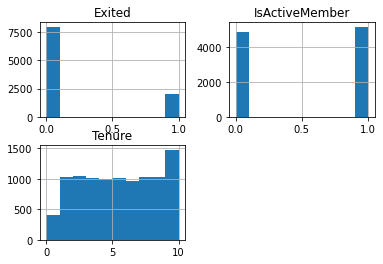

In [9]:
churn_data.hist(['Exited', 'IsActiveMember', 'Tenure'])

In [11]:
churn_data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder_1 = OrdinalEncoder()
encoder_2 = OrdinalEncoder()
churn_data['Geography_code'] = encoder_1.fit_transform(churn_data[['Geography']])
churn_data['Gender_code'] = encoder_2.fit_transform(churn_data[['Gender']])

In [18]:
churn_data.drop(columns = ['Geography', 'Gender'], inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
churn_train, churn_test = train_test_split(churn_data, test_size = 0.2)
churn_train_X = churn_train.loc[:,churn_train.columns != 'Exited']
churn_train_y = churn_train['Exited']
churn_test_X = churn_test.loc[:, churn_test.columns != 'Exited']
churn_test_y = churn_test['Exited']

In [53]:
from sklearn.ensemble import RandomForestClassifier
bank_churn_classifier = RandomForestClassifier(max_depth = 2, n_estimators = 100, criterion = 'entropy', random_state = 0)
bank_churn_classifier.fit(churn_train_X, churn_train_y)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=0)

In [54]:

from sklearn import metrics
churn_prediction_y = bank_churn_classifier.predict(churn_test_X)
metrics.accuracy_score(churn_test_y, churn_prediction_y)

0.8185

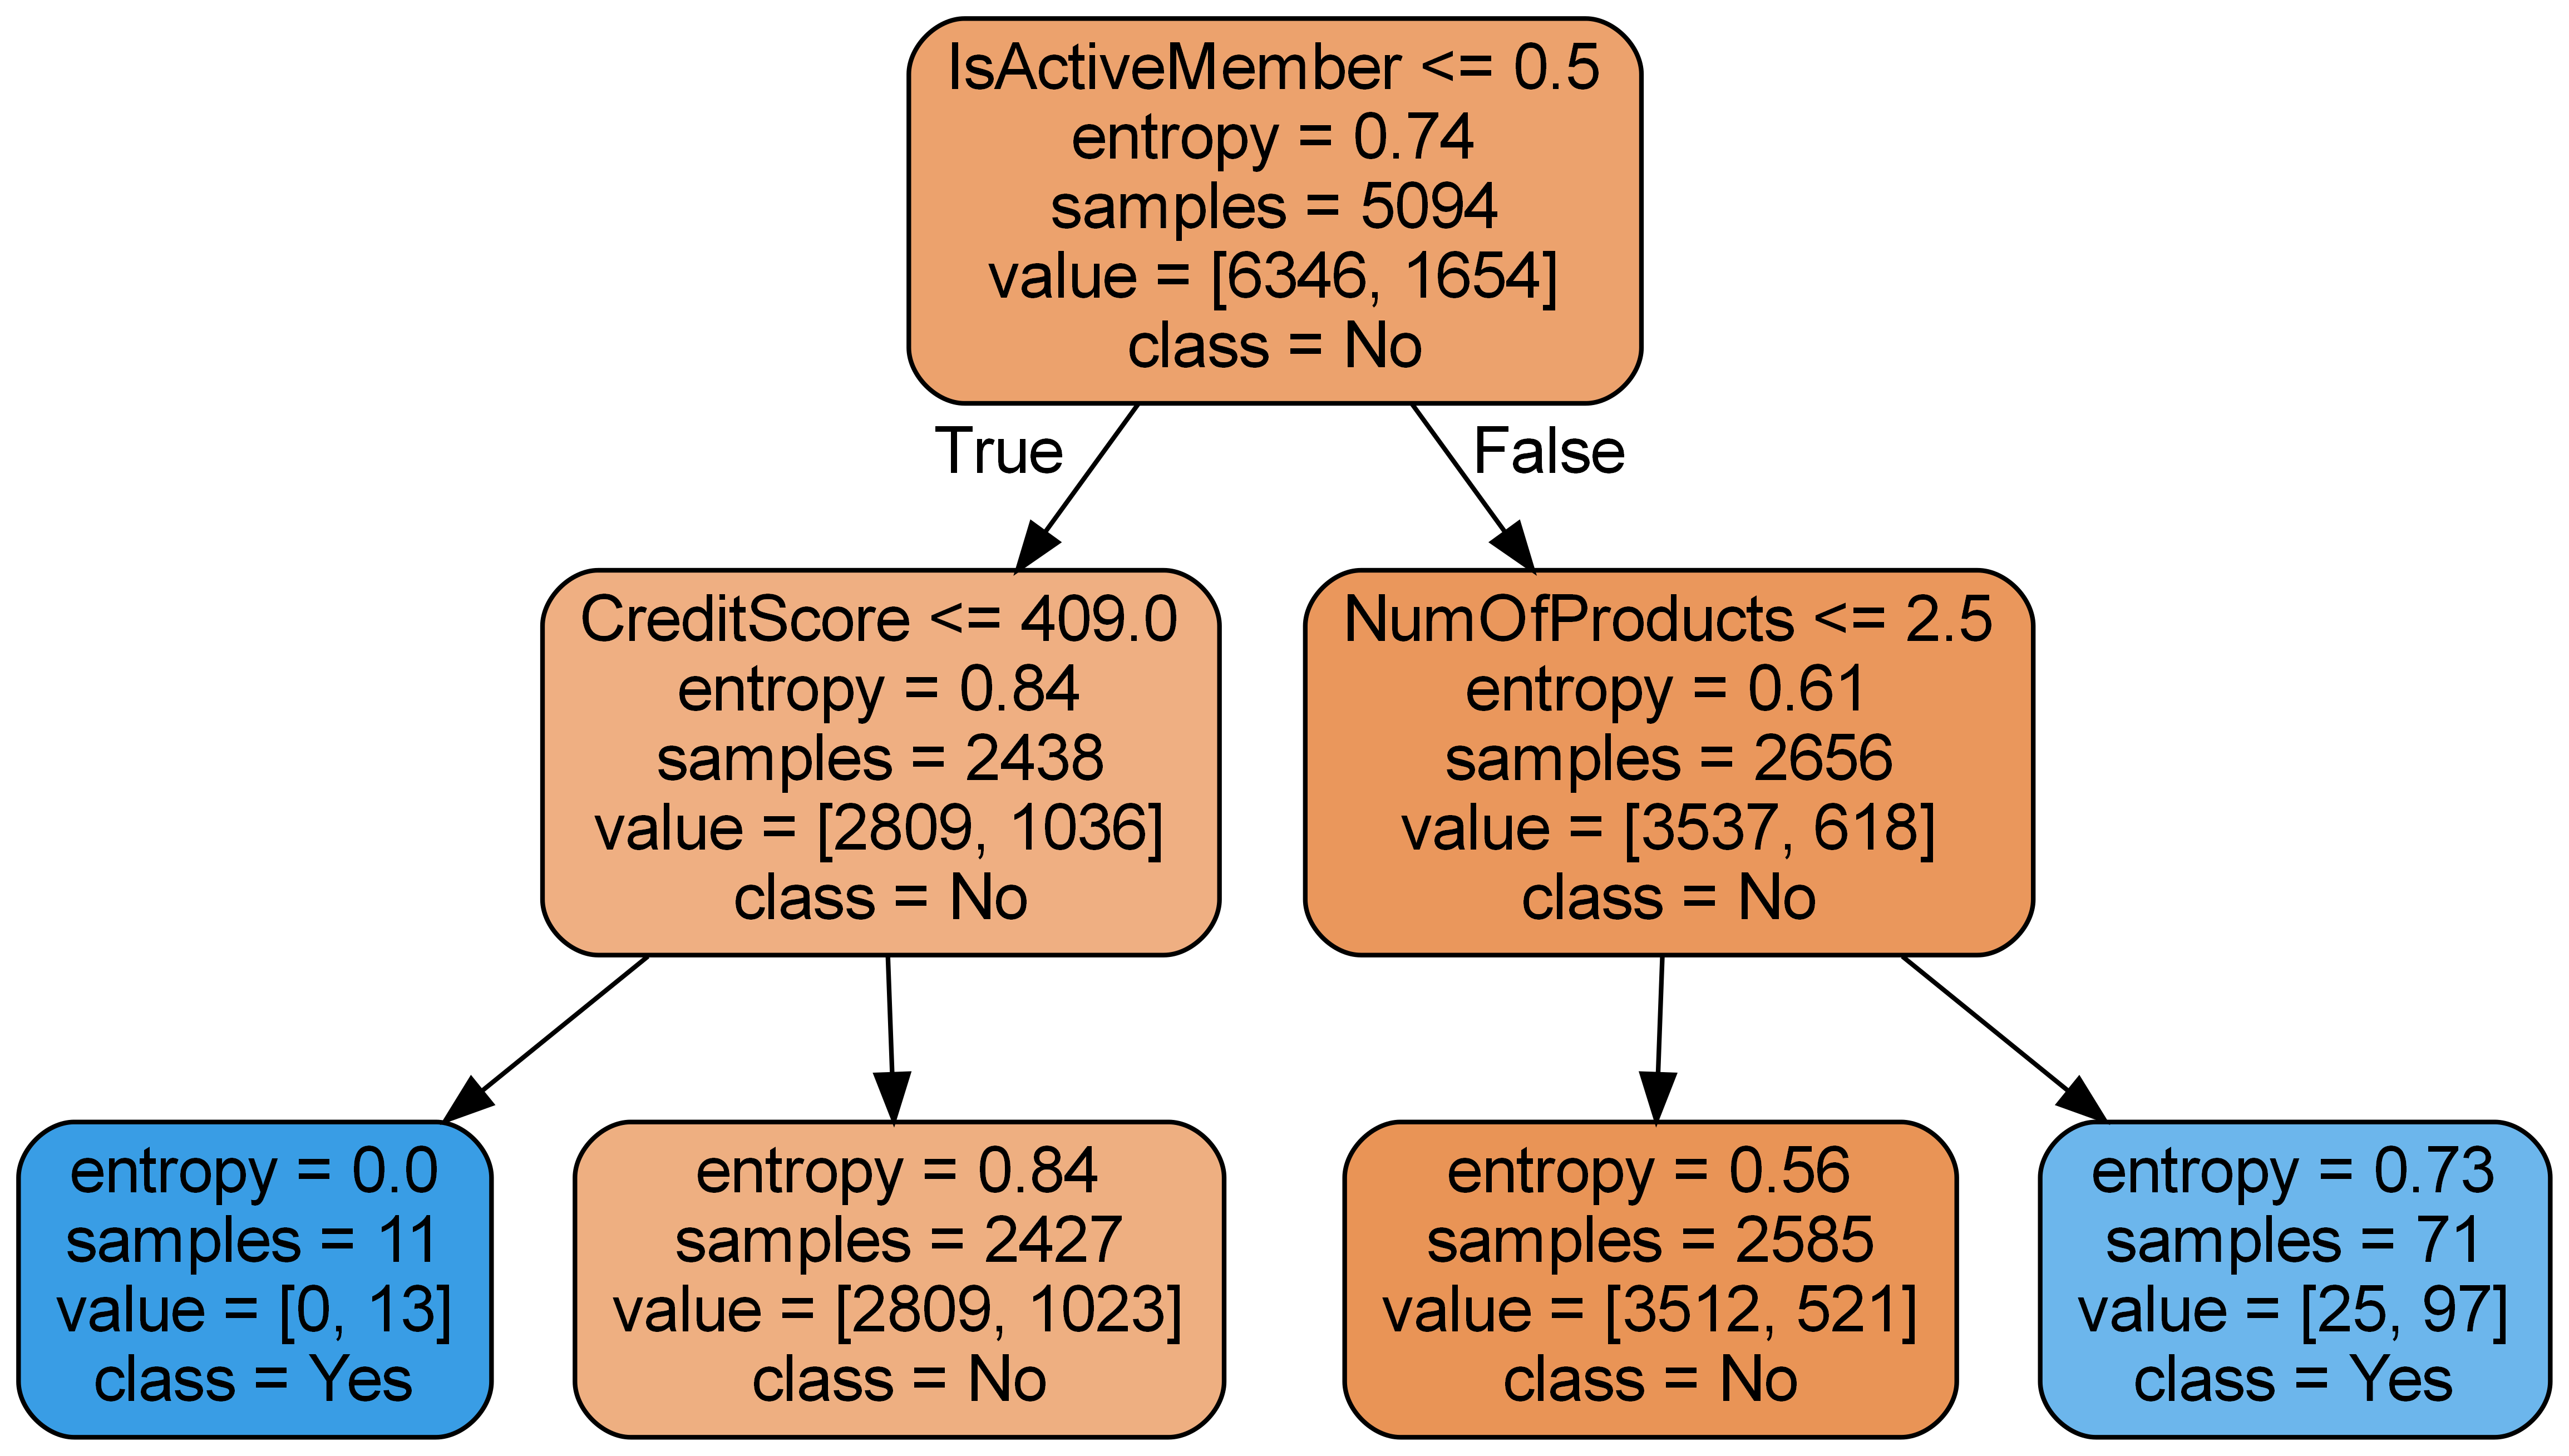

In [55]:

estimator = bank_churn_classifier.estimators_[1]

from sklearn.tree import export_graphviz# Export as dot file

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = churn_train_X.columns,
                class_names = ['No', 'Yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')